# Градиентный спуск


## Теория
Последовательность $x_k$ генерируется по правилу

$$
x_{k+1} = x_k + \alpha_k h_k
$$

так что

$$
f(x_{k+1}) < f(x_k)
$$

Направление антиградиента 

$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$

даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид

$$
x_{k+1} = x_k - \alpha f'(x_k)
$$

Теперь озаботмся выбором $\alpha$:
 Наискорейший спуск

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

Заметим что данная задача является одномерной и для ее решения можно воспользоваться методом золотого сечения

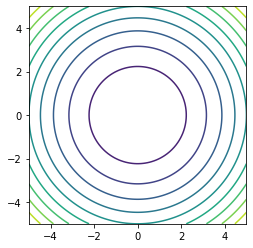

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import numpy as np
%matplotlib inline

#передаем функцию как столбец аргументов
def f1(x):
    return x[0]**2 + x[1]**2#можно взять другую функцию 

def grad1(x):
    return np.array([2*x[0], 2*x[1]]).reshape([-1,1])


x = np.linspace(-5, 5, 100)#создание последовательности из 100 элементов с равным интервалом
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
#print(x, y, X, Y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 10)
plt.axis('square')
pass


[[4. 3.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


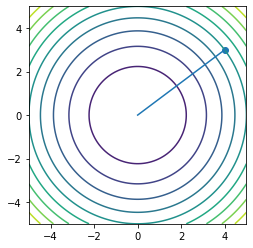

In [24]:

def gd(x, f, grad, max_iter=10):
    min = np.zeros((max_iter+1, len(x)))
    min[0] = x.ravel()
    for i in range(max_iter):
        res = minimize_scalar(lambda alpha: f(x - alpha * grad(x)))
        #print(res)
        alpha = res.x
        x = x - alpha * grad(x)
        min[i+1] = x.ravel()
    return min


x0 = np.array([4,3]).reshape([-1,1])#можно взять другую точку старта 

min = gd(x0, f1, grad1, max_iter=5)
print (min)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 10)
plt.plot(min[:, 0], min[:, 1], '-')
plt.scatter(min[0:1, 0], min[0:1, 1])
plt.axis('square')
pass